# Inspect Dataset

In [2]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

base_dir = Path("../datasets")

## Track 1 (Subject Identification)

In [3]:
t1 = base_dir/Path("SPGC_challenge_track_1_release")
t1_train = t1/"training_data"
t1_test = t1/"test_data"

Data are divided in training, validation and test set.
All sets contain data from 46 subjects:
- in *training_data* folder, each subject has its own folder together with train and validation data.
- in *test_data* folder, data are totally anonymus.

In [4]:
len(os.listdir(t1_train)), len(os.listdir(t1_test))

(46, 521)

Training and validation can contain different number of observations for each subject. Distrbution is the same to both sets.

In [5]:
subjects = ["{:02d}".format(x) for x in range(46)]
num_train_samples = []
num_val_samples = []

for subject_id in subjects:
    sub_train = t1_train/Path(f"user_{subject_id}/train")
    sub_val = t1_train/Path(f"user_{subject_id}/val")
    num_train_samples.append(len(os.listdir(sub_train)))
    num_val_samples.append(len(os.listdir(sub_val)))

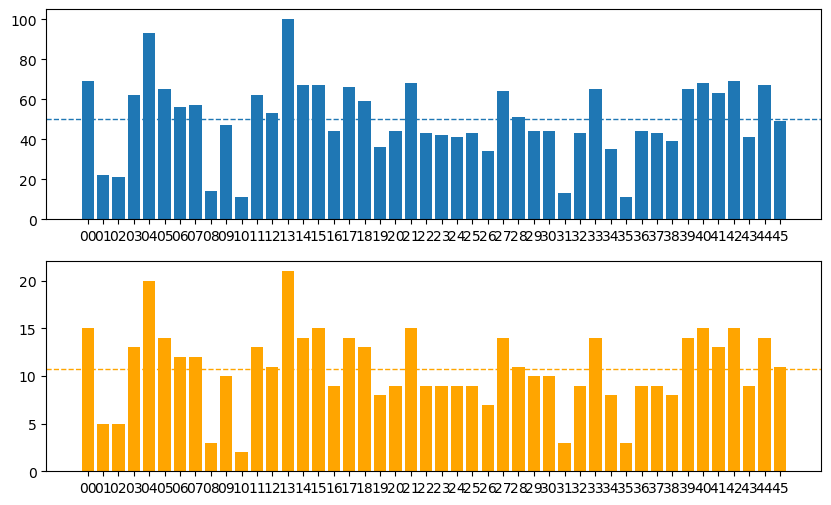

In [12]:
# Figure Size
fig, axs = plt.subplots(2, figsize =(10, 6))
 
# Horizontal Bar Plot
axs[0].bar(subjects, num_train_samples)
axs[1].bar(subjects, num_val_samples, color='orange')
axs[0].axhline(sum(num_train_samples)/len(num_train_samples), linewidth=1, linestyle='--')
axs[1].axhline(sum(num_val_samples)/len(num_val_samples), color='orange', linewidth=1, linestyle='--')

# Show Plot
plt.show()

Data are divided into daily-observations. Let's go deeper into a single observation.

In [8]:
subject_id = "02"
sub_train = t1_train/Path(f"user_{subject_id}/train")
sub_val = t1_train/Path(f"user_{subject_id}/val")

data = pd.read_csv(sub_train/Path("00/data.csv"))
step = pd.read_csv(sub_train/Path("00/step.csv"))

A single observation is daily-based and it contains data and step files. 
Consecutive observations are NOT consecutive days. 
They were ramdomly sampled.

Different days take into acccount different hours during day. 

In [9]:
data.head()

,acc_X,acc_Y,acc_Z,gyr_X,gyr_Y,gyr_Z,heartRate,rRInterval,timecol,sleeping
0,0.325136,-0.008786,0.078363,-0.092842,-0.047158,0.109789,0.00,0.00,02:22:25,0
1,0.133162,-0.004203,0.055093,-0.051800,-0.025900,0.035700,0.00,641.32,02:22:30,0
2,0.136782,-0.010552,0.048949,-0.095900,-0.089600,0.110600,47.40,873.16,02:22:35,0
3,0.148215,-0.030664,0.140358,1.188600,1.013600,-1.001000,69.36,841.08,02:22:40,0
4,0.170486,0.013523,0.024249,0.217700,0.172200,0.100800,70.96,834.52,02:22:45,0


In [10]:
data.describe()

,acc_X,acc_Y,acc_Z,gyr_X,gyr_Y,gyr_Z,heartRate,rRInterval,sleeping
count,11821.000000,11821.000000,11821.000000,11821.000000,11821.000000,11821.000000,11821.000000,11821.000000,11821.000000
mean,-0.020771,-0.123165,0.067678,-0.219323,-0.073429,0.093683,74.961133,828.611465,0.662381
std,0.335780,0.298990,0.263230,4.552318,4.021721,3.885185,12.452373,111.572005,0.472918
min,-5.972168,-5.371522,-3.281689,-51.182602,-56.454300,-49.193900,-3.000000,0.000000,0.000000
25%,-0.032486,-0.232968,-0.001915,-0.077700,-0.077700,0.023100,66.200000,735.720000,0.000000
50%,0.000672,-0.094571,0.078130,-0.051100,-0.046900,0.050400,70.000000,856.080000,1.000000
75%,0.041248,-0.002043,0.146689,-0.015556,-0.019600,0.070700,84.000000,905.400000,1.000000
max,5.712781,3.057290,3.518684,41.145300,55.507900,46.321102,134.541667,1502.760000,1.000000


**Data**

Columns:
- acc_X, acc_Y, acc_Z. Data from accelorometer (linear acceleration). Valid in [-19.6, 19.6].
- gyr_X, gyr_Y, gyr_Z. Data from gyroscope (angular velocity).  Valid in [-573, 573].
- heartRate. BPM. Valid > 0.
- rRInterval. ms between two R-R. Valid > 0.
- timecol. Timestamps.
- sleeping. 0 awake, 1 sleeping.

All values are mean values in a 5s time window.

In [11]:
step.head()

,start_time,end_time,totalSteps,stepsWalking,stepsRunning,distance,calories
0,00:03:30,00:04:04,63,63,0,40.59,1.91
1,00:29:16,00:30:27,27,27,0,16.79,0.82
2,00:30:41,00:31:09,46,46,0,32.73,1.50
3,00:31:09,00:32:00,75,75,0,55.11,2.54
4,00:32:00,00:33:00,70,70,0,47.55,2.17


In [12]:
step.describe()

,totalSteps,stepsWalking,stepsRunning,distance,calories
count,49.000000,49.000000,49.0,49.000000,49.000000
mean,35.469388,35.469388,0.0,25.203898,1.221837
std,22.660632,22.660632,0.0,16.774416,0.843454
min,6.000000,6.000000,0.0,0.000000,0.000000
25%,18.000000,18.000000,0.0,11.970000,0.590000
50%,27.000000,27.000000,0.0,16.790000,0.820000
75%,46.000000,46.000000,0.0,38.830000,1.910000
max,89.000000,89.000000,0.0,61.380000,3.510000


**Step**

Columns:
- start_time, end_time. Timestamps while walking.
- totalSteps, stepsWalking, stepsRunning. Number of steps in the given interval.
- distance.
- calories. 

## Track 2 (Relapse Detection)

In [13]:
t2 = base_dir/Path("SPGC_challenge_track_2_release")
t2_train = t2/"training_data"
t2_test = t2/"test_data"

len(os.listdir(t2_train)), len(os.listdir(t2_test))

(10, 10)

Data are divided in training, validation and test set.
All sets contain data from 10 subjects that experienced relapses during the data collection:
- in *training_data* folder, each subject has its own folder together with train and validation data.
- in *test_data* folder, each subject has its own folder with test data.

Test and validation data are divided into normal and relapses data.

To access observations follow the subsequent format:

training_data/user_{user_id}/{set}/{status}/{day} if set is train or val

test_data/user_{user_id}/test/{day} if set is test

In [14]:
subjects = ["{:02d}".format(x) for x in range(10)]
num_train_samples_normal = []
num_val_samples_normal = []
#num_train_samples_relapse = []
num_val_samples_relapse = []

for subject_id in subjects:
    sub_train_normal = t2_train/Path(f"user_{subject_id}/train/normal")
    #sub_train_relapse = t2_train/Path(f"user_{subject_id}/train/relapse")
    sub_val_normal = t2_train/Path(f"user_{subject_id}/val/normal")
    sub_val_relapse = t2_train/Path(f"user_{subject_id}/val/relapse")
    num_train_samples_normal.append(len(os.listdir(sub_train_normal)))
    #num_train_samples_relapse.append(len(os.listdir(sub_train_relapse)))
    num_val_samples_normal.append(len(os.listdir(sub_val_normal)))
    num_val_samples_relapse.append(len(os.listdir(sub_val_relapse)))

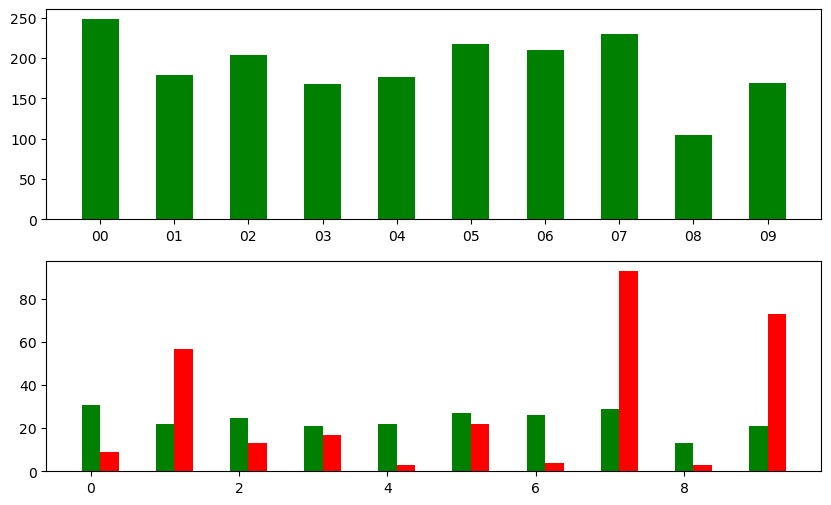

In [15]:
# Figure Size
fig, axs = plt.subplots(2, figsize =(10, 6))
 
# Horizontal Bar Plot
axs[0].bar(subjects, num_train_samples_normal, color='g', width = 0.5)

# Set position of bar on X axis
barWidth = 0.25
br1 = np.arange(len(subjects))
br2 = [x + barWidth for x in br1]
 
axs[1].bar(br1, num_val_samples_normal, color='g', width = barWidth)
axs[1].bar(br2, num_val_samples_relapse, color='r', width = barWidth)
 
# Show Plot
plt.show()